In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/YourCabs.csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [ ]:
df.drop(columns=['id', 'user_id', 'from_lat', 'from_long', 'to_lat', 'to_long', 'booking_created'], inplace=True)
df['from_date'] = pd.to_datetime(df['from_date'], errors='coerce')

In [ ]:
df['hour'] = df['from_date'].dt.hour
df['day_of_week'] = df['from_date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df.drop(columns=['from_date'], inplace=True)

In [ ]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

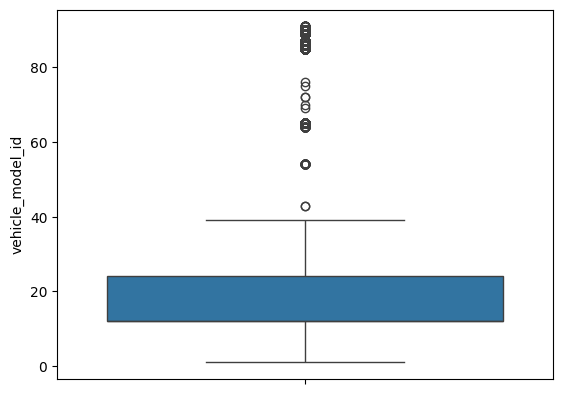

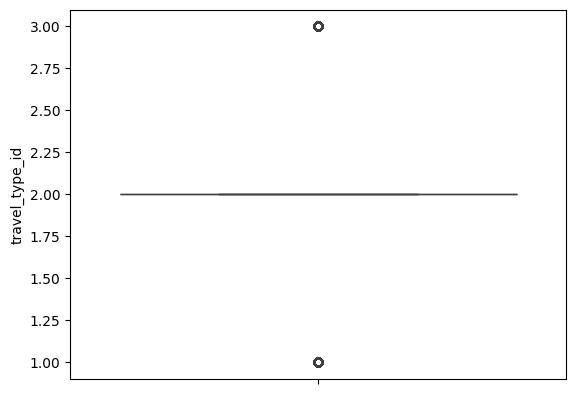

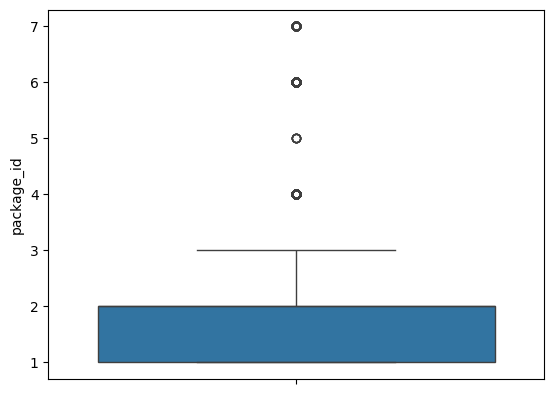

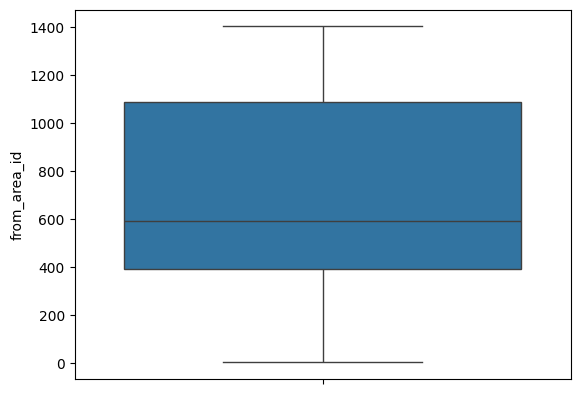

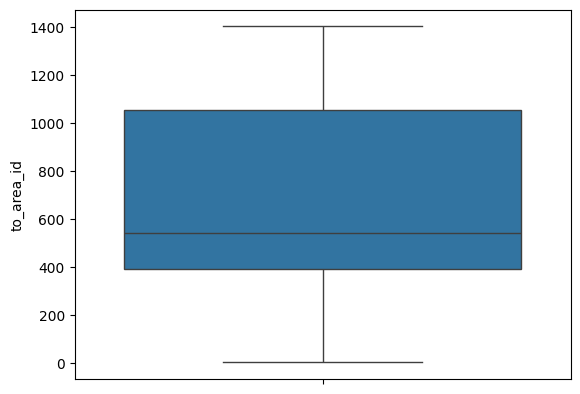

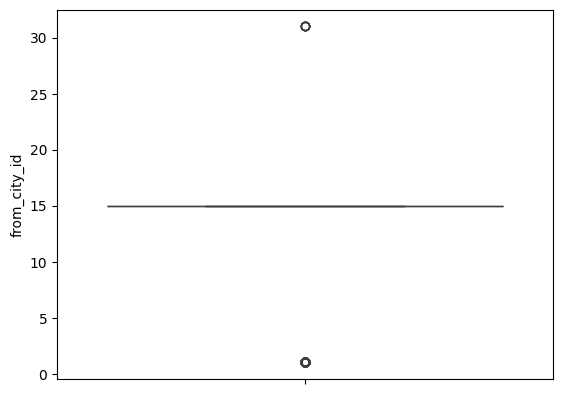

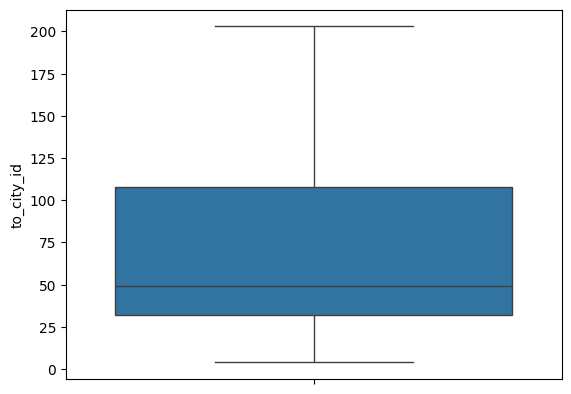

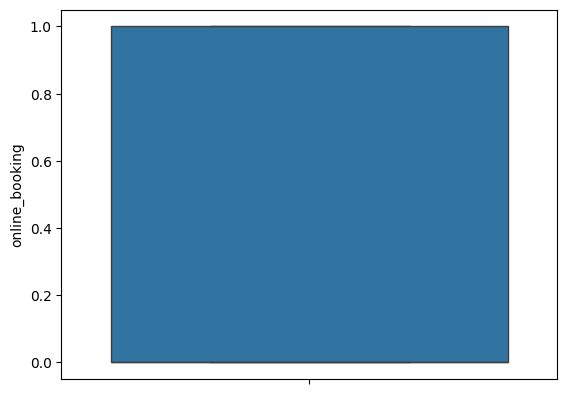

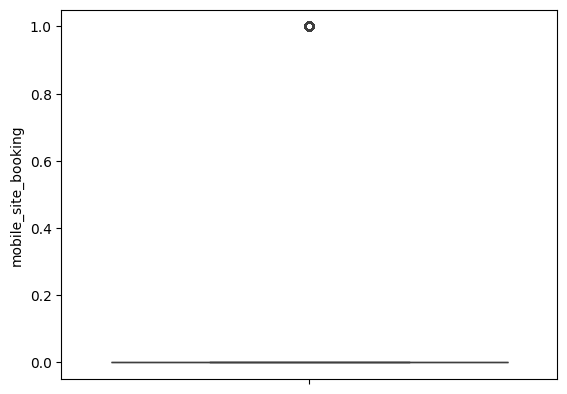

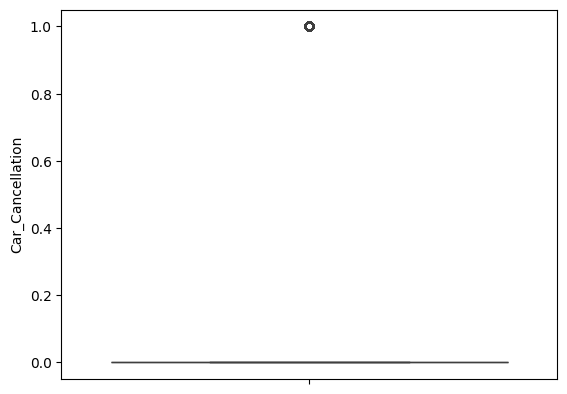

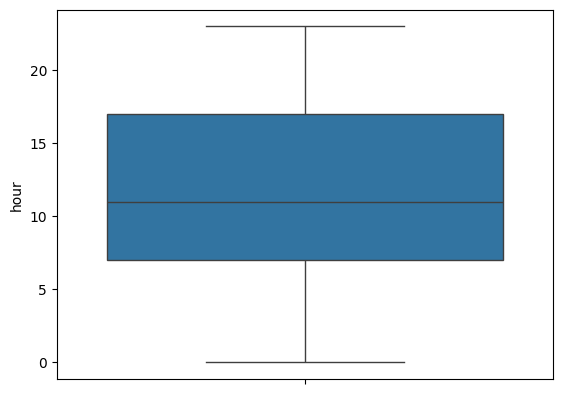

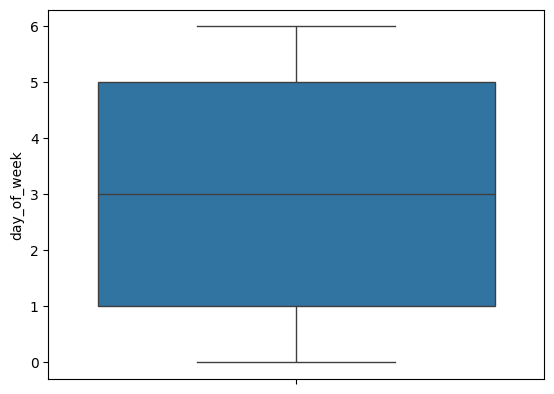

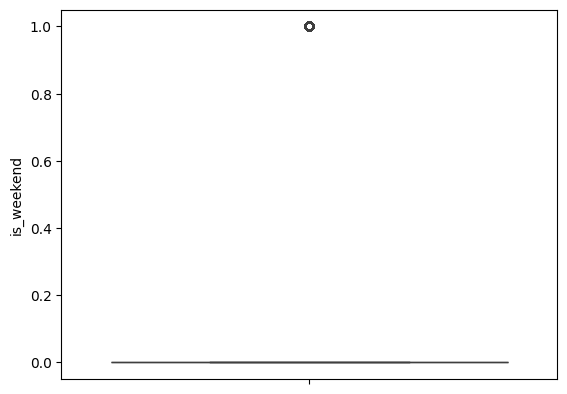

In [ ]:
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [ ]:
Income_Q1 = df['travel_type_id'].quantile(0.25)
Income_Q3 = df['travel_type_id'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['travel_type_id'] = np.where(df['travel_type_id']>Income_Upper,Income_Upper,
                                              np.where(df['travel_type_id']<Income_Lower,Income_Lower,
                                                       df['travel_type_id']))
Income_Q1 = df['vehicle_model_id'].quantile(0.25)
Income_Q3 = df['vehicle_model_id'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['vehicle_model_id'] = np.where(df['vehicle_model_id']>Income_Upper,Income_Upper,
                                              np.where(df['vehicle_model_id']<Income_Lower,Income_Lower,
                                                       df['vehicle_model_id']))
Income_Q1 = df['package_id'].quantile(0.25)
Income_Q3 = df['package_id'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['package_id'] = np.where(df['package_id']>Income_Upper,Income_Upper,
                                              np.where(df['package_id']<Income_Lower,Income_Lower,
                                                       df['package_id']))
Income_Q1 = df['from_city_id'].quantile(0.25)
Income_Q3 = df['from_city_id'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['from_city_id'] = np.where(df['from_city_id']>Income_Upper,Income_Upper,
                                              np.where(df['from_city_id']<Income_Lower,Income_Lower,
                                                       df['from_city_id']))
Income_Q1 = df['Car_Cancellation'].quantile(0.25)
Income_Q3 = df['Car_Cancellation'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['Car_Cancellation'] = np.where(df['Car_Cancellation']>Income_Upper,Income_Upper,
                                              np.where(df['Car_Cancellation']<Income_Lower,Income_Lower,
                                                       df['Car_Cancellation']))
Income_Q1 = df['mobile_site_booking'].quantile(0.25)
Income_Q3 = df['mobile_site_booking'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['mobile_site_booking'] = np.where(df['mobile_site_booking']>Income_Upper,Income_Upper,
                                              np.where(df['mobile_site_booking']<Income_Lower,Income_Lower,
                                                       df['mobile_site_booking']))
Income_Q1 = df['is_weekend'].quantile(0.25)
Income_Q3 = df['is_weekend'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['is_weekend'] = np.where(df['is_weekend']>Income_Upper,Income_Upper,
                                              np.where(df['is_weekend']<Income_Lower,Income_Lower,
                                                       df['is_weekend']))
Income_Q1 = df['to_city_id'].quantile(0.25)
Income_Q3 = df['to_city_id'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['to_city_id'] = np.where(df['to_city_id']>Income_Upper,Income_Upper,
                                              np.where(df['to_city_id']<Income_Lower,Income_Lower,
                                                       df['to_city_id']))
Income_Q1 = df['day_of_week'].quantile(0.25)
Income_Q3 = df['day_of_week'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['day_of_week'] = np.where(df['day_of_week']>Income_Upper,Income_Upper,
                                              np.where(df['day_of_week']<Income_Lower,Income_Lower,
                                                       df['day_of_week']))
Income_Q1 = df['hour'].quantile(0.25)
Income_Q3 = df['hour'].quantile(0.75)
Income_IQR = Income_Q3 - Income_Q1
Income_Upper =Income_Q3 + Income_IQR*1.5
Income_Lower = Income_Q1 - Income_IQR*1.5
df['hour'] = np.where(df['hour']>Income_Upper,Income_Upper,
                                              np.where(df['hour']<Income_Lower,Income_Lower,
                                                       df['hour']))

In [ ]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

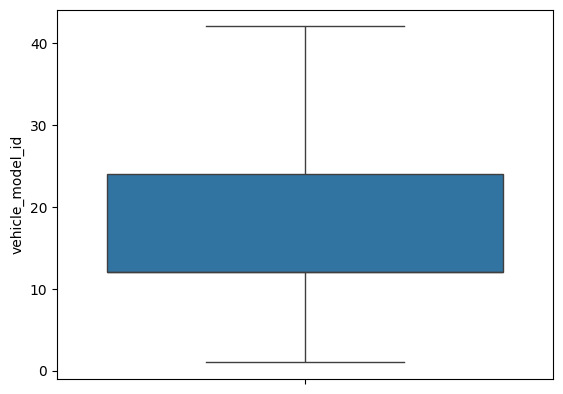

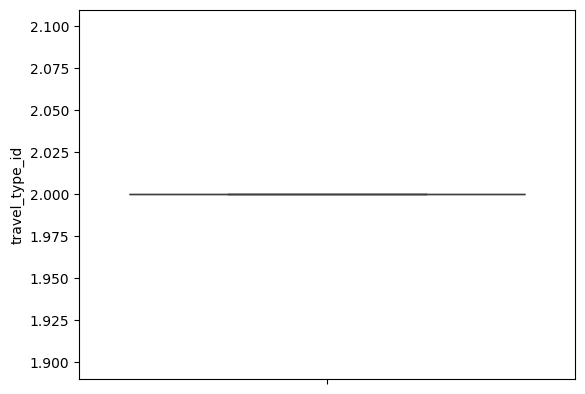

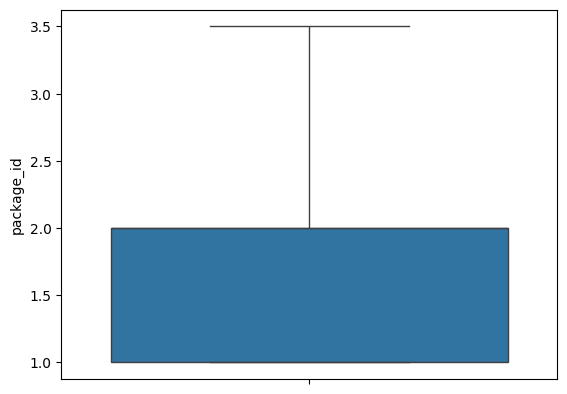

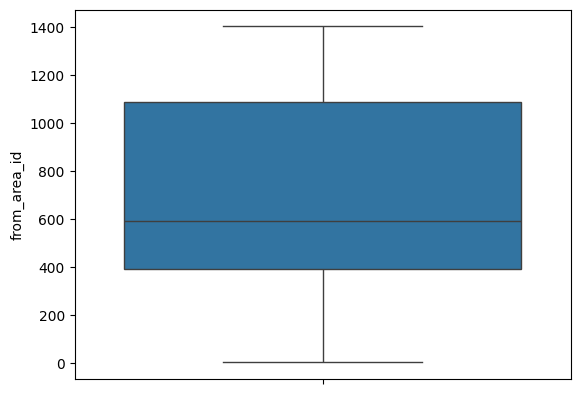

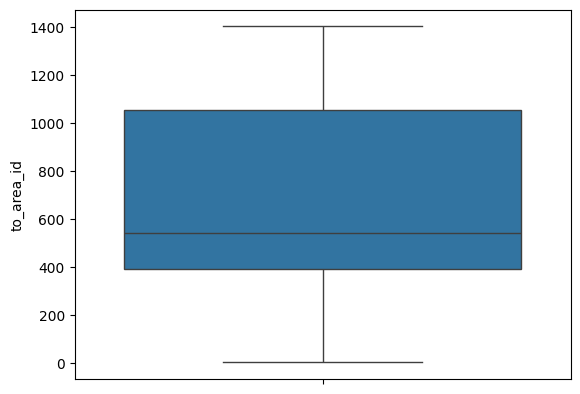

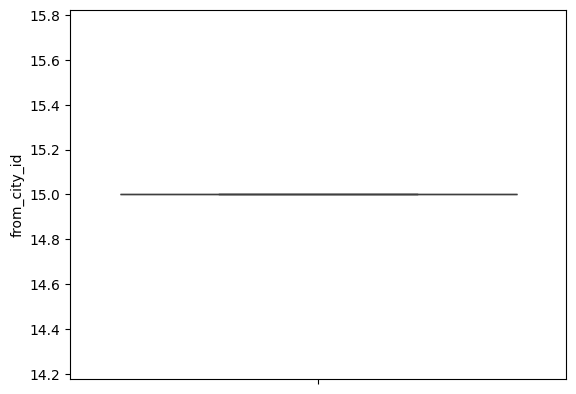

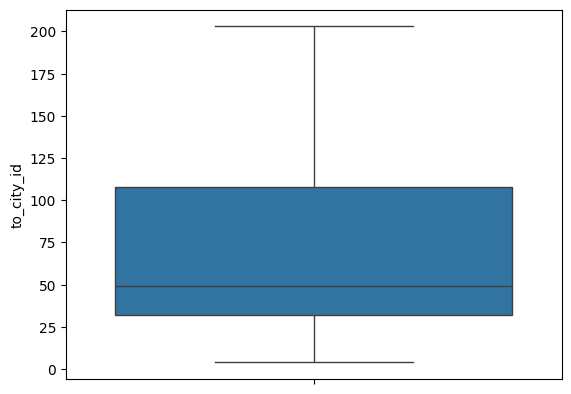

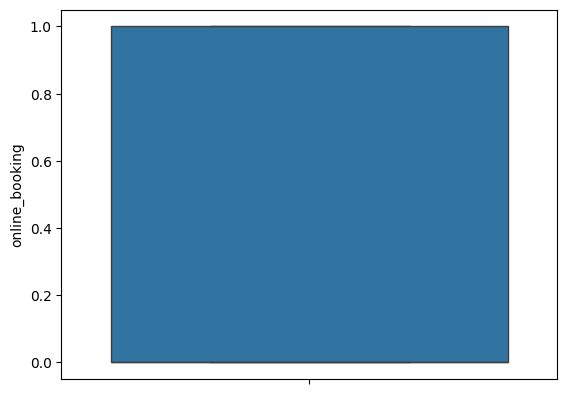

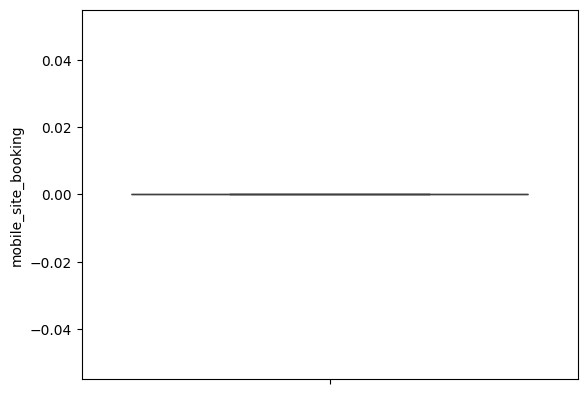

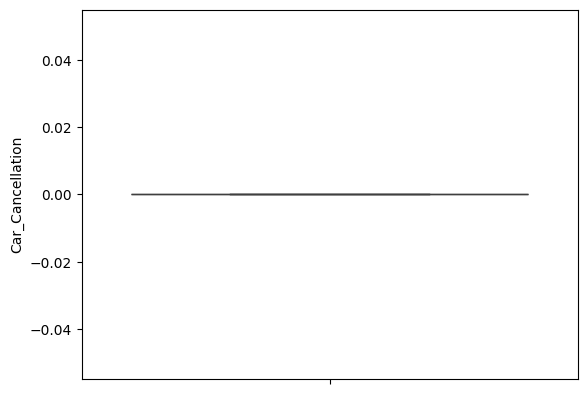

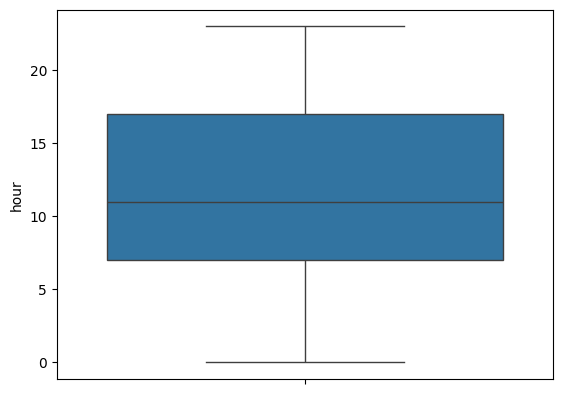

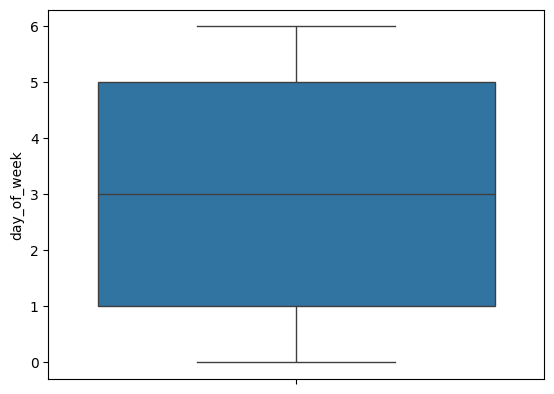

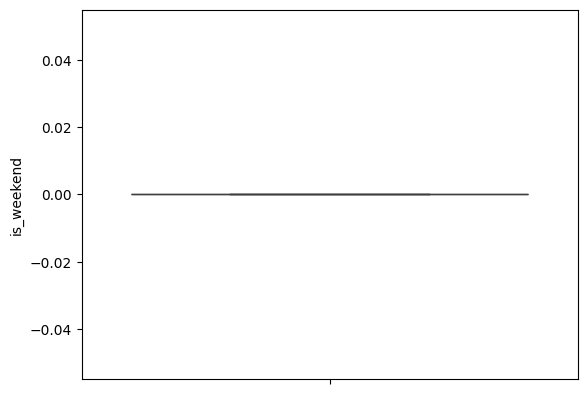

In [ ]:
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [ ]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

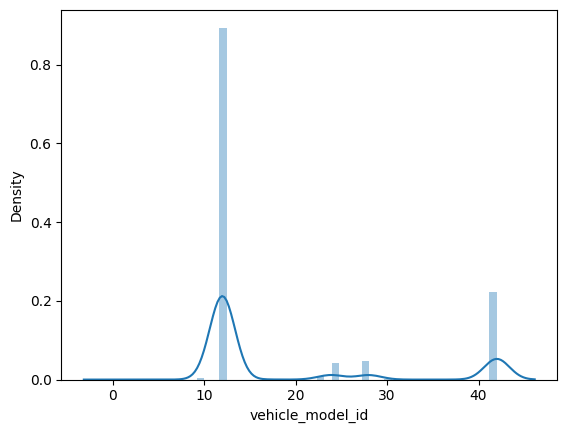

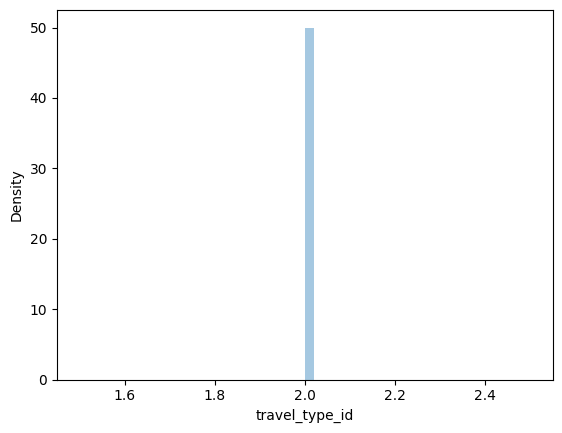

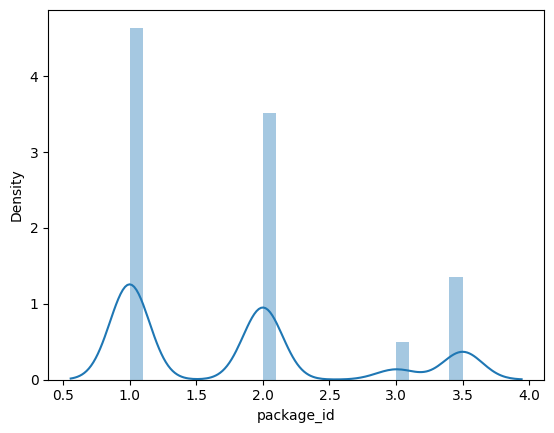

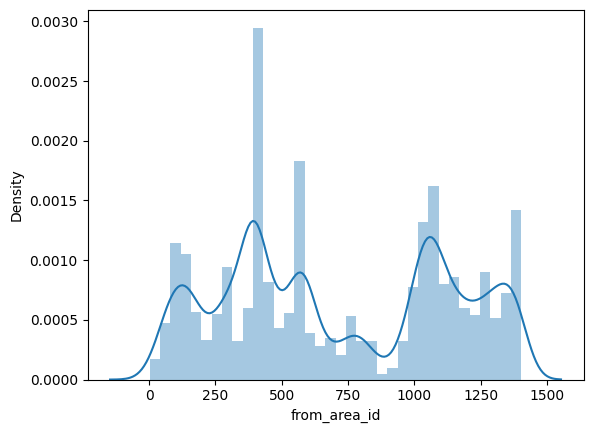

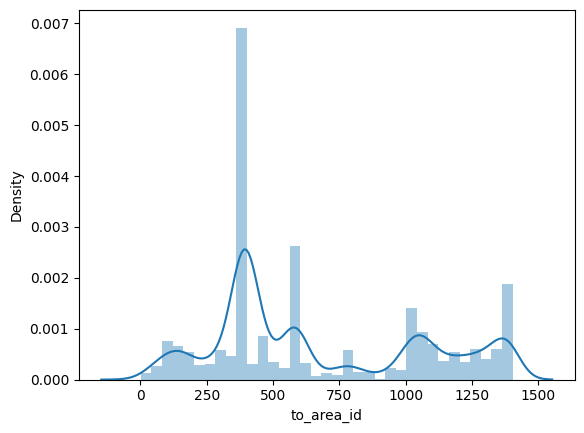

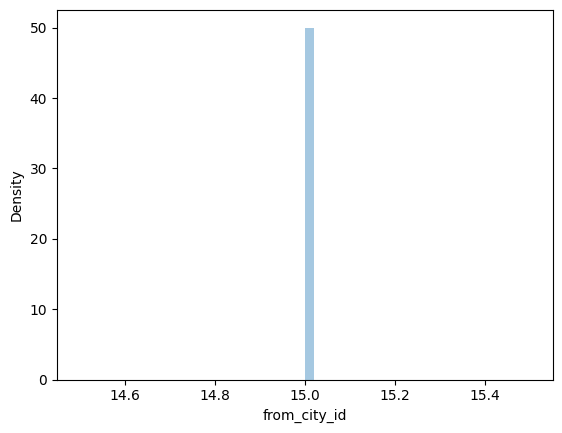

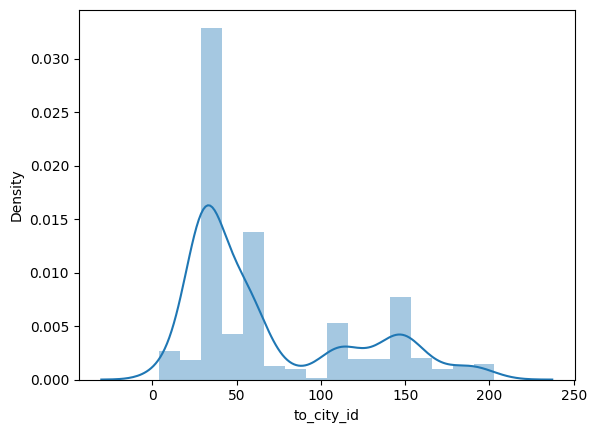

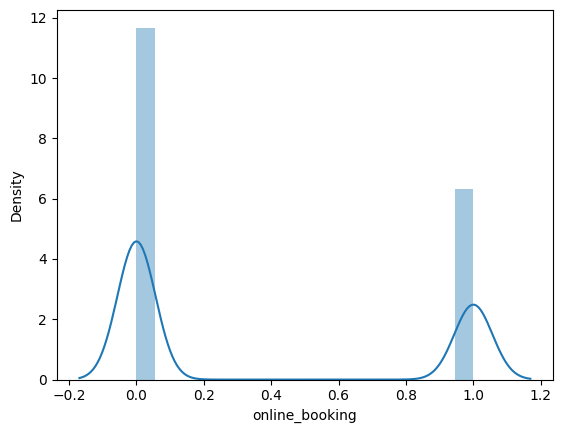

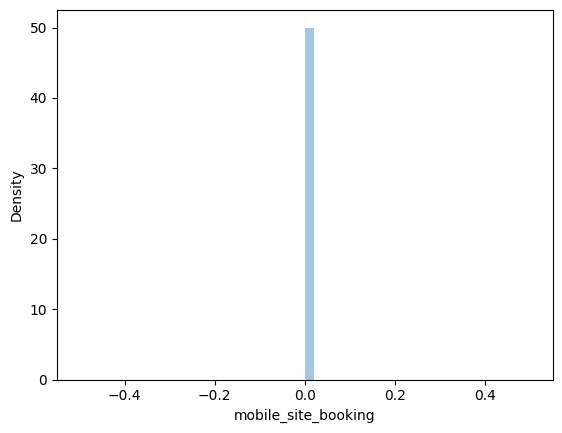

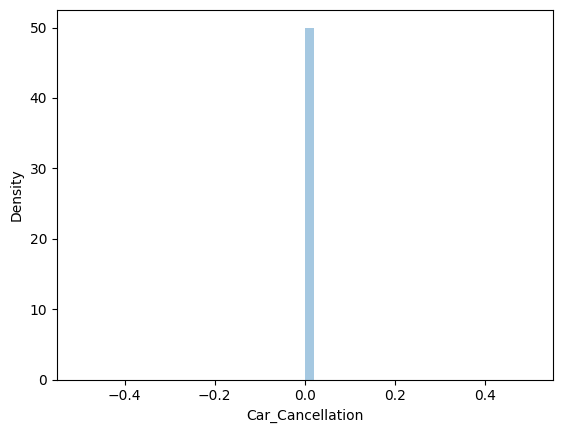

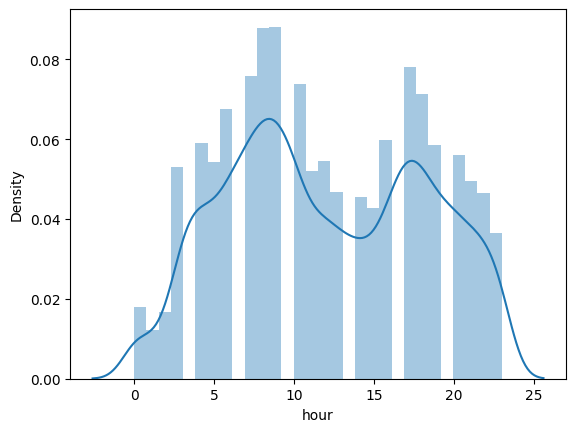

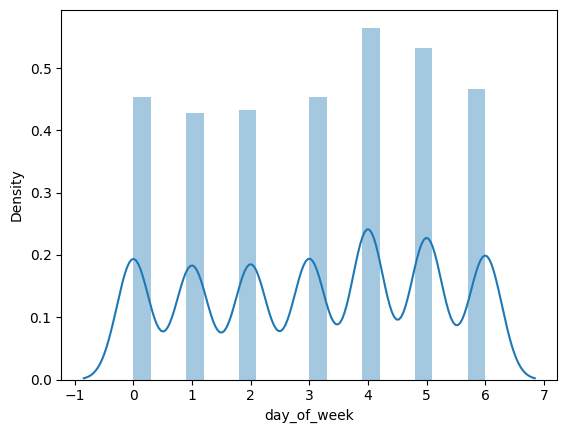

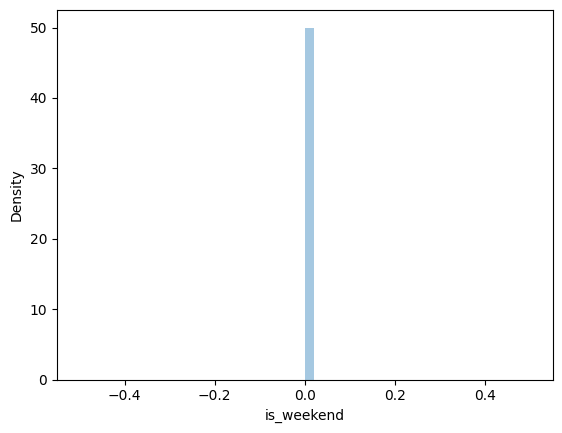

In [ ]:
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
vehicle_model_id,0
travel_type_id,0
package_id,0
from_area_id,0
to_area_id,0
from_city_id,0
to_city_id,0
online_booking,0
mobile_site_booking,0
Car_Cancellation,0


In [ ]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
models = {}

In [ ]:
for ttype in [1, 2, 3]:
    print(f"\n--- Training Random Forest for travel_type_id = {ttype} ---")

    subset = df[df['travel_type_id'] == ttype].copy()
    if subset.empty:
        print(f"No data for travel_type_id = {ttype}, skipping.")
        continue
    X = subset.drop(columns=['Car_Cancellation'])
    y = subset['Car_Cancellation']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    joblib.dump(model, f"rf_model_travel_type_{ttype}.pkl")
    models[ttype] = model
    y_pred = model.predict(X_test)
    print(f"\n📊 Evaluation for travel_type_id = {ttype}")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))
    print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Training Random Forest for travel_type_id = 1 ---
No data for travel_type_id = 1, skipping.

--- Training Random Forest for travel_type_id = 2 ---

📊 Evaluation for travel_type_id = 2
✅ Accuracy: 1.0
📄 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8687

    accuracy                           1.00      8687
   macro avg       1.00      1.00      1.00      8687
weighted avg       1.00      1.00      1.00      8687

📉 Confusion Matrix:
 [[8687]]

--- Training Random Forest for travel_type_id = 3 ---
No data for travel_type_id = 3, skipping.
